<img src="avocado.jpg">

<h1>Prediction of Average Prices of Avocado in USA</h1>

<h3>Context</h3>

It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

<h3>Content</h3>

The data represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the data reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the data reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this data.

<h3>Columns in our dataset</h3>

- index
- Date: The date of the observation
- AveragePrice: The average price of a single avocado
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold
- Total Bags
- Small Bags
- Large Bags
- XLarge Bags
- type: conventional or organic
- year: The year
- region: The city or region of the observation

<h2>Step 1: Importing our Dataset</h2>

In [103]:
import pandas as pd
dataset = pd.read_csv("avocado.csv")
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


We are using the pandas library to read the the csv file named avocado.The file contains information on the following features: • Date - The date of the observation • AveragePrice - the average price of a single avocado • Total Volume - Total number of avocados sold • 4046 - Total number of avocados with PLU 4046 sold • 4225 - Total number of avocados with PLU 4225 sold • 4770 - Total number of avocados with PLU 4770 sold • Total Bags • Small Bags • Large Bags • XLarge Bags • type - conventional or organic • year - the year • region - the city or region of the observation 

In [104]:
dataset.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [105]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)

**The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it !**

In [106]:
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [107]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


**Well as a first observation we can see that we are lucky, we dont have any missing values (18249 complete data) and 13 columns. Now let's do some Feature Engineering on the Date Feature so we can be able to use the day and the month columns in building our machine learning model later.**

In [108]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Month']=dataset['Date'].apply(lambda x:x.month)
dataset['Day']=dataset['Date'].apply(lambda x:x.day)
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


**Here we add two more columns month and day where 6 in Month implies the month "June" & 15 in Day implies the 15th day of a month.**

<h2>Step 2: Analysis of Average Prices</h2>

Text(0.5, 1.0, 'Average Price')

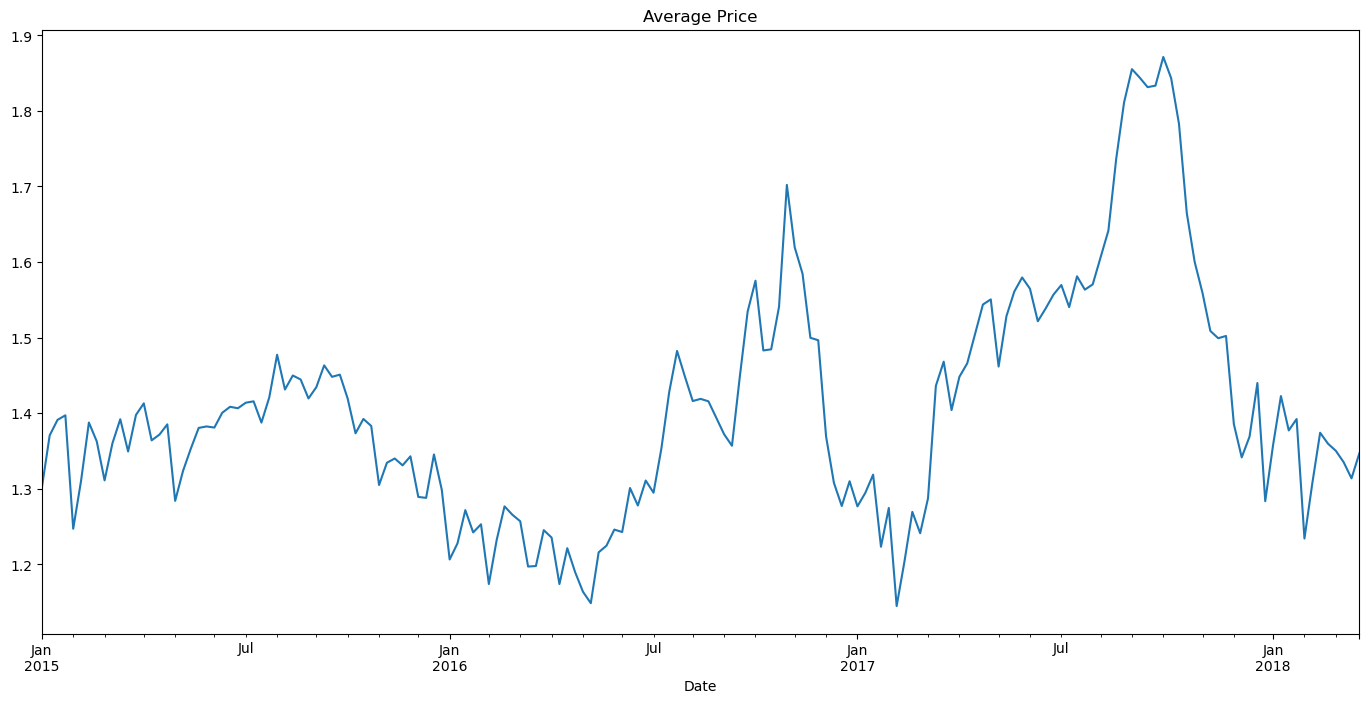

In [109]:
import matplotlib.pyplot as plt

byDate=dataset.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=100)
byDate['AveragePrice'].plot()
plt.title('Average Price')

**Hence the plot shows the average price of avocado at various points of time**

Text(0.5, 1.0, 'Average Price Per Month')

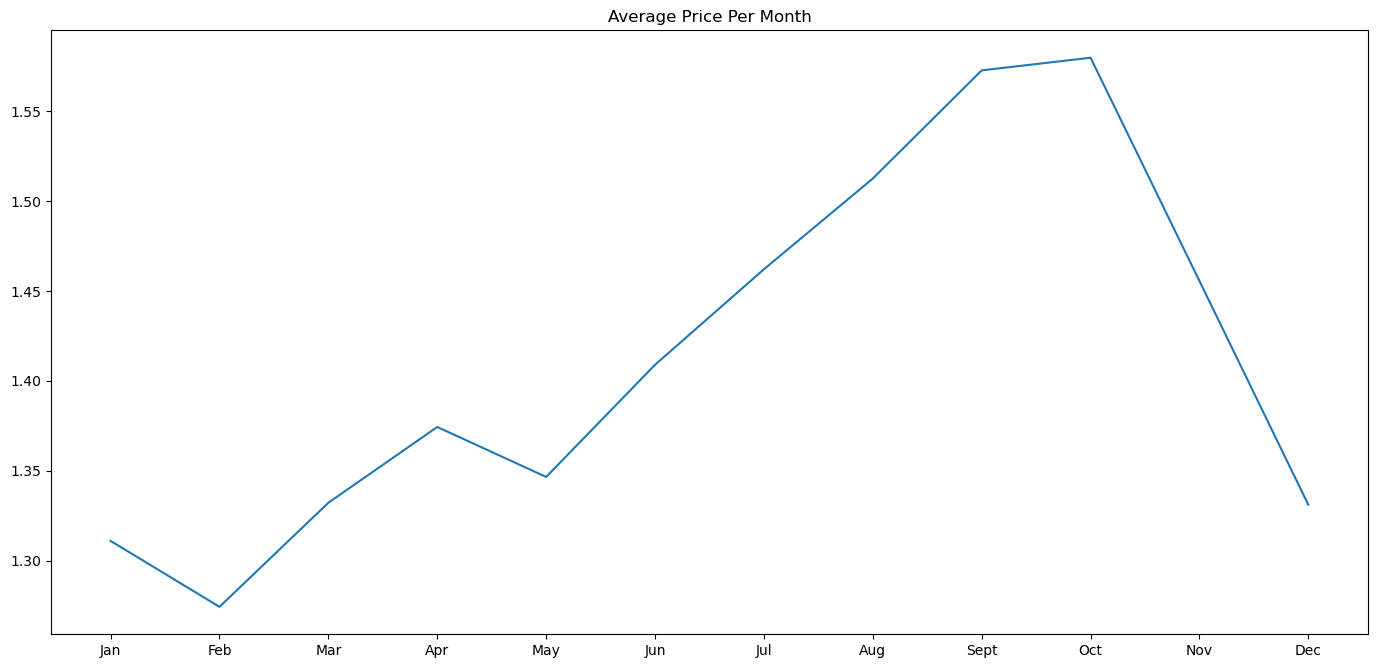

In [110]:
byMonth = dataset.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

**From the above graph plotted for average price of avocado per month we can observe that the price rises for a while in February to March then it falls in April and then the month of May witnesses a rise in the average price. This rise reaches its zenith in the month of October and henceforth it starts to fall.**

Text(0.5, 1.0, 'Average Price Per Day')

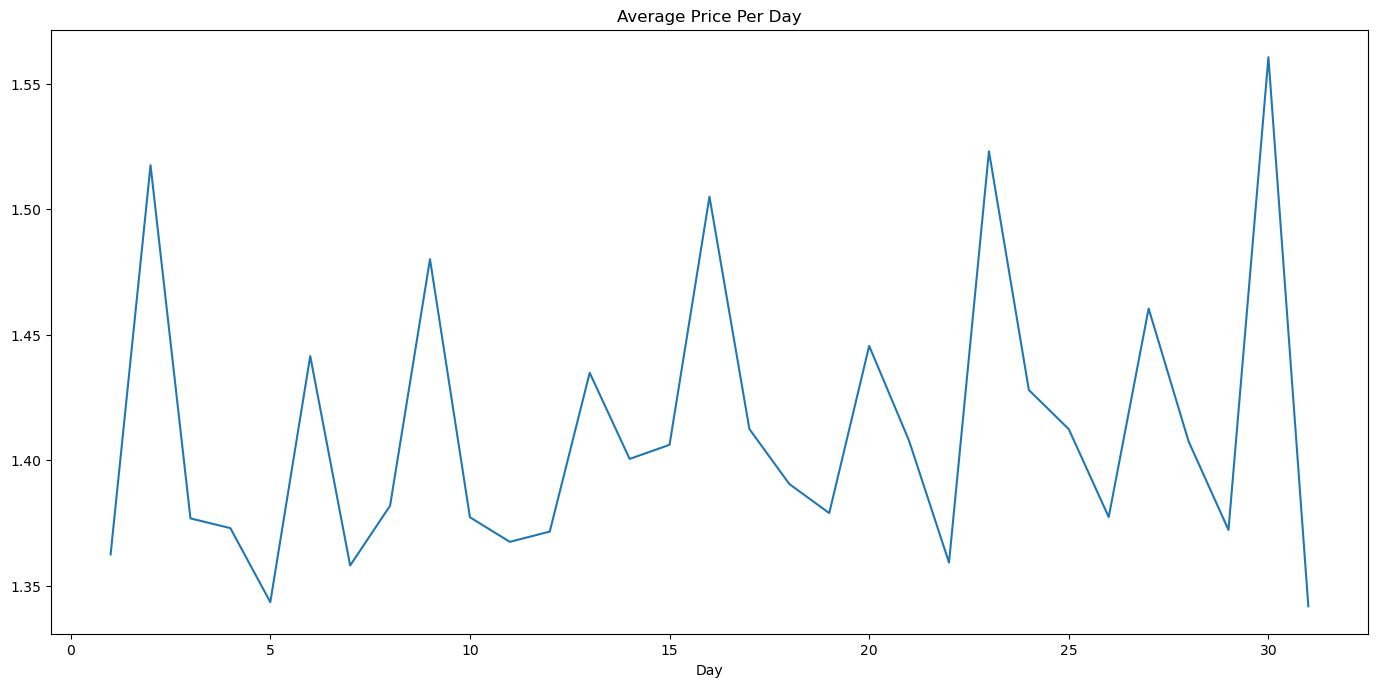

In [111]:
byDay = dataset.groupby("Day").mean()
plt.figure(figsize=(17,8),dpi=100)
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

**The above graph for average price per day implies that the price fluctuates in a similar manner at a regular interval.**

Text(0.5, 1.0, 'Average Price According to Region')

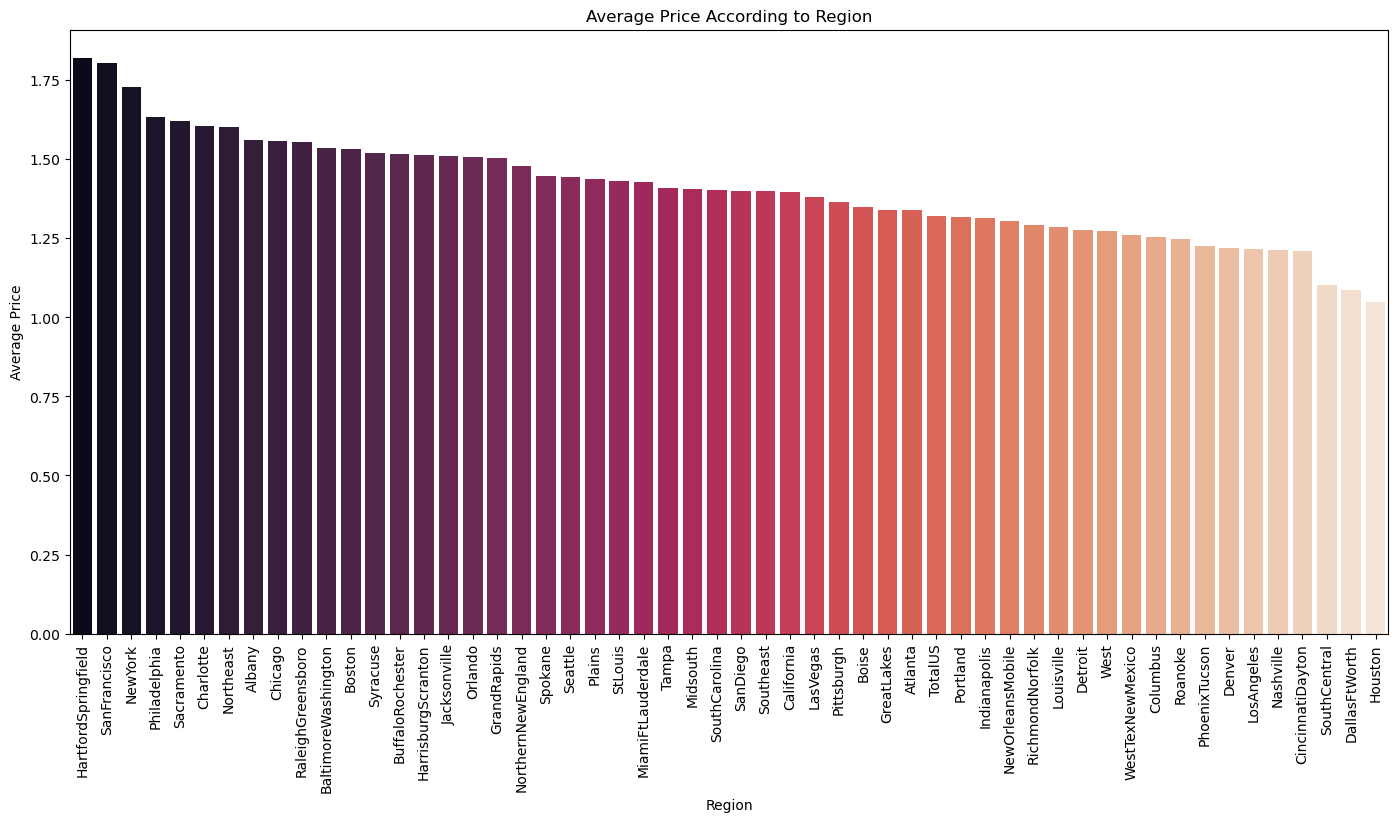

In [112]:
import seaborn as sns

byRegion=dataset.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

**The barplot shows the average price of avocado at various regions in a ascending order. Clearly Hartford Springfield, SanFrancisco, NewYork are the regions with the highest avocado prices.**

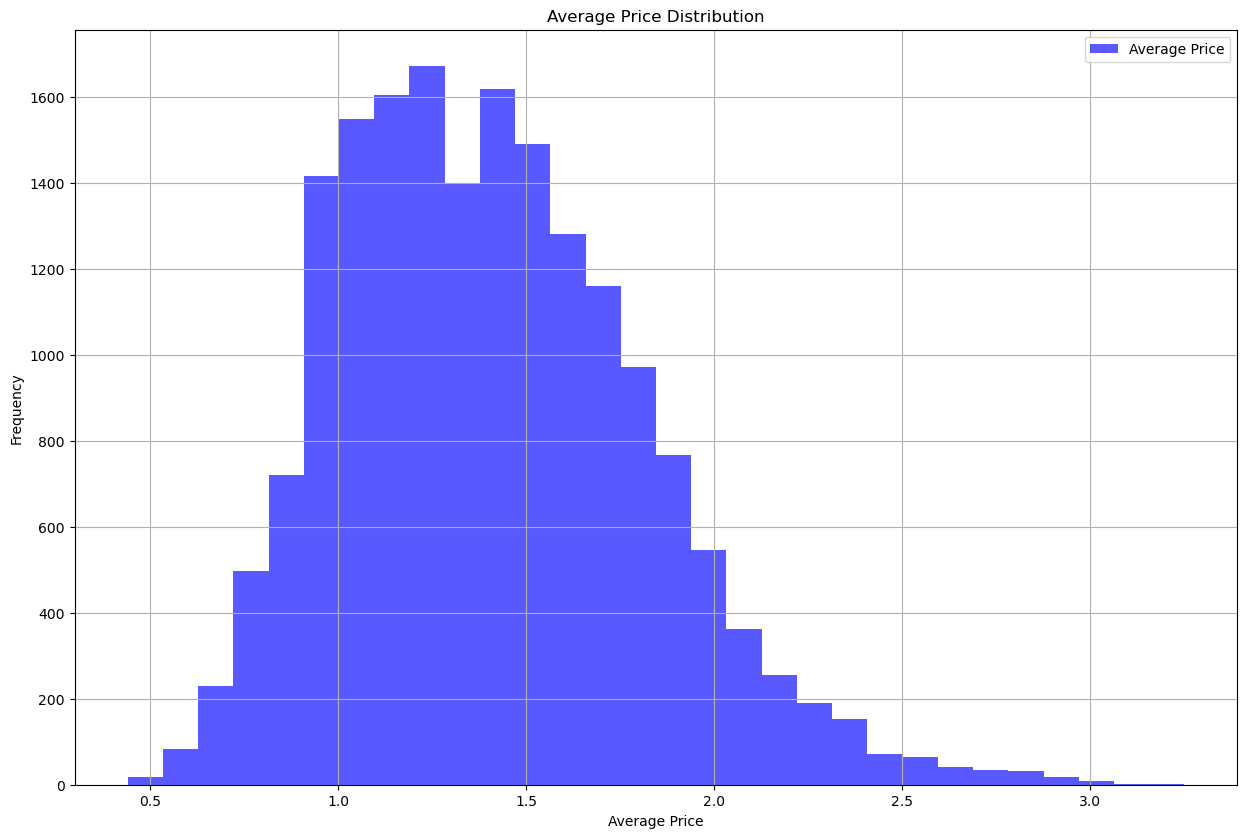

In [113]:
plt.figure(figsize=(15,10),dpi=100)
dataset["AveragePrice"].plot(kind="hist",color="blue",bins=30,grid=True,alpha=0.65,label="Average Price")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

**The above histogram for the average price of avocado suggests that its distribution is somewhat positively skewed.**

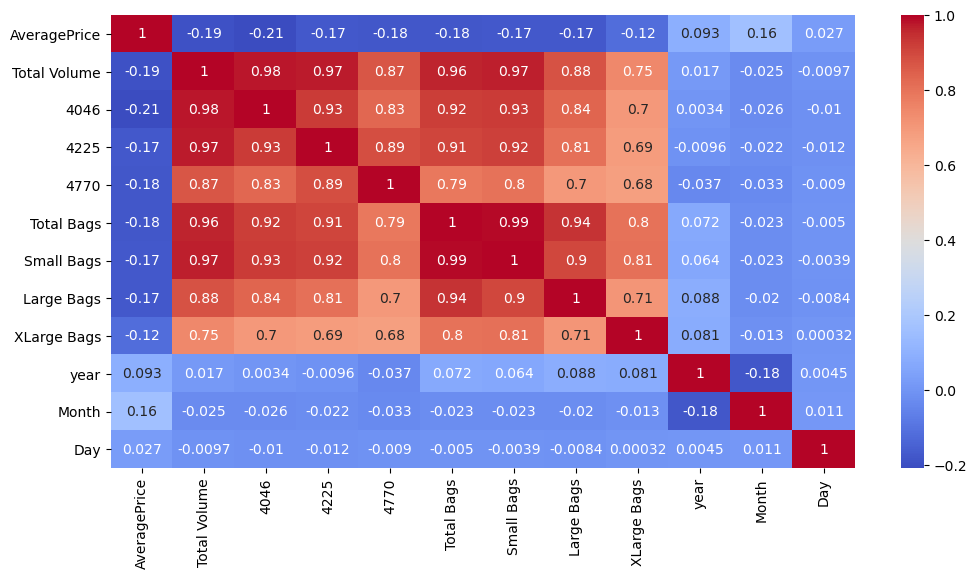

In [114]:
import numpy as np

corr_df = dataset.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

**As we can from the heatmap above, all the Features are not correlated with the Average Price column, instead most of them are correlated with each other.**

C:\Users\DELL\anaconda3\envs\mypython37\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


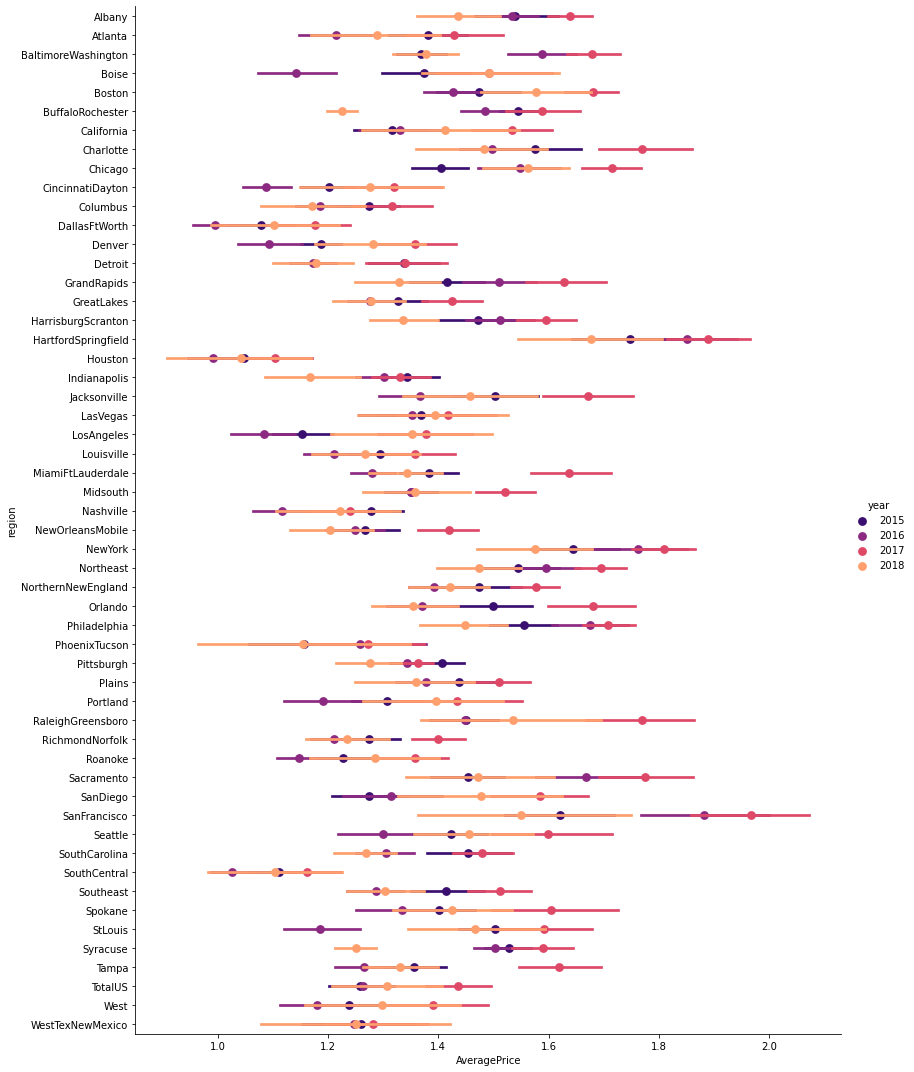

In [115]:
sns.factorplot('AveragePrice','region',data=dataset,
                   hue='year',
                   aspect=0.8,
                   height=15,
                   palette='magma',
                   join=False,
              )

**A factor plot is simply the same plot generated for different response and factor variables and arranged on a single page. The underlying plot generated can be any univariate or bivariate plot. The scatter plot is the most common application.
The above plot is a factor plot of average avocado price for different regions classified by year.**

In [116]:
dataset_vif = dataset.copy()
dataset_vif.drop(columns=['Date','type','region'],inplace = True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Xf = add_constant(dataset_vif)
pd.Series([variance_inflation_factor(Xf.values, i) 
               for i in range(Xf.shape[1])], 
              index=Xf.columns)

const           5.068485e+06
AveragePrice    1.099766e+00
Total Volume    4.918067e+09
4046            6.598339e+08
4225            5.978631e+08
4770            4.762133e+06
Total Bags      2.370316e+14
Small Bags      1.364727e+14
Large Bags      1.448103e+13
XLarge Bags     7.622174e+10
year            1.101665e+00
Month           1.071816e+00
Day             1.001467e+00
dtype: float64

**The above code snippet calculates the variable inflation factor for the displayed variables.**

<h2>Step 3: Taking Care of the Outliers</h2>

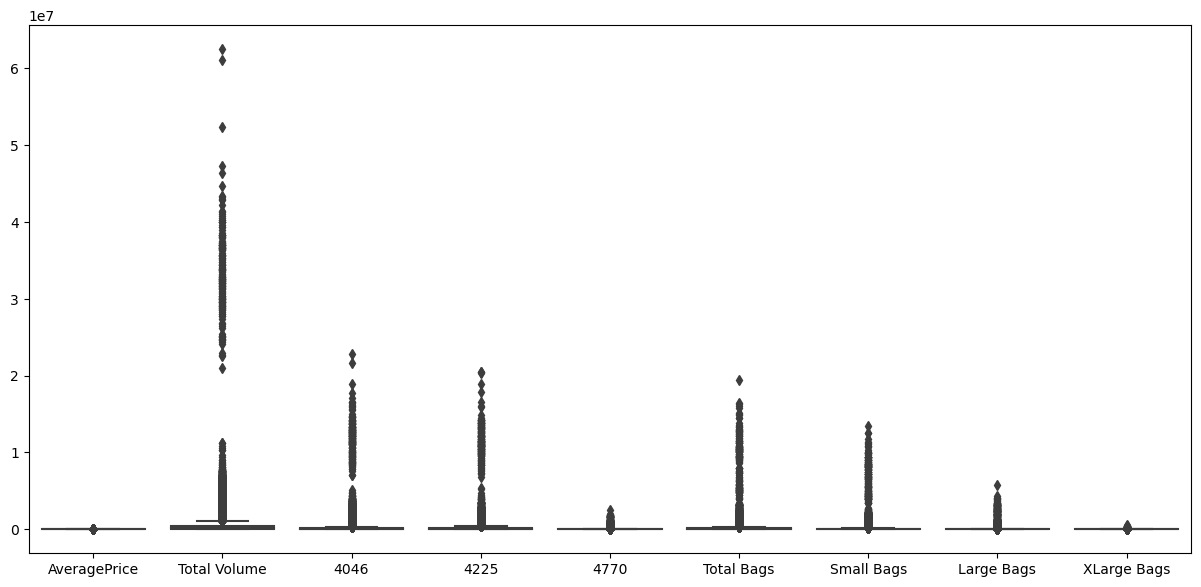

In [117]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = dataset[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

**Clearly the boxplot indicates that all the variables contains outliers. Now we need to take care of the outliers.**

In [118]:
dataset.drop(columns=["Date"],inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


**Before we go on to taking care of the outliers we removed the "Date" variable from our dataset as it is useless now.**

In [119]:
import numpy as np
from numpy import percentile

columns = dataset.columns
for j in columns:
    if isinstance(dataset[j][0], str) :
        continue
    else:
        for i in range(len(dataset)):
            #defining quartiles
            quartiles = percentile(dataset[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if dataset[j][i] > upper_fence:
                dataset[j][i] = upper_fence
            elif dataset[j][i] < lower_fence:
                dataset[j][i] = lower_fence

C:\Users\DELL\anaconda3\envs\mypython37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


**In the following code snippet we have we replaced the outliers higer than the upper whisker by the value of the upper whisker and the outliers lower than the lower whisker by the value of the lower whisker.**

In [120]:
dataset.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


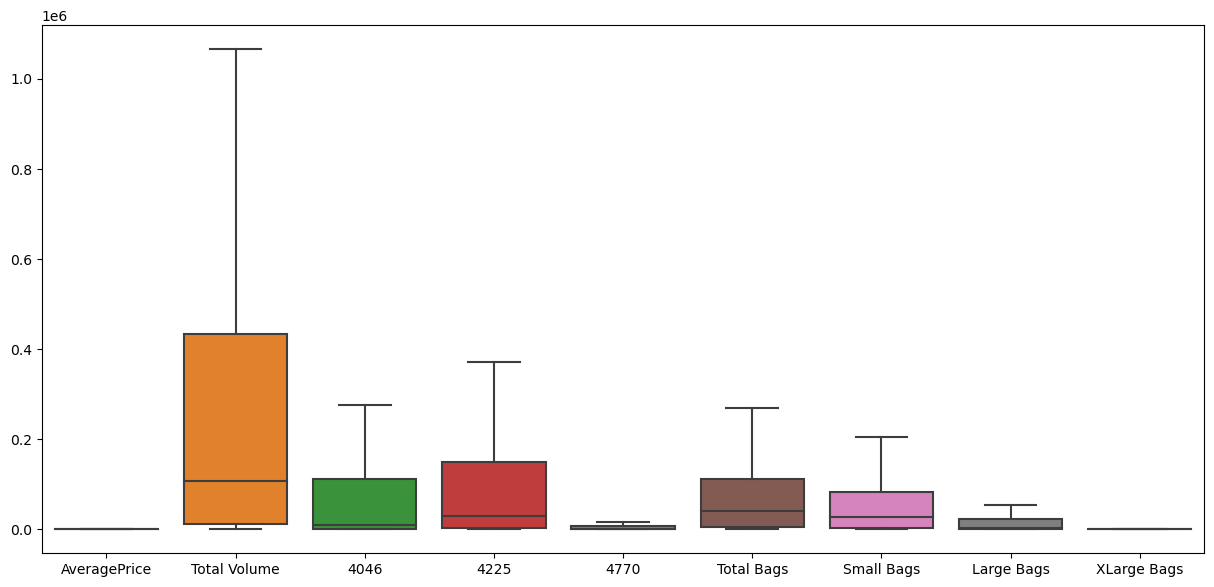

In [121]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = dataset[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

**Now clearly our data is free from outliers. Now we can fit our data to appropriate models.**

<h2>Step 4: Taking Care of the Categorical Variables</h2>

**Now since our data contains categorical variables like "type", "month" and "region" we apply one-hot encoding to our variables "region","month" and apply label encoding in variable "type".**

**One hot encoding creates equal number of columns, with 1's and 0's, as the number of categories in a categorical variable a column for a specific category contains 1's where the category is present and 0's elsewhere.**

**As for label encoding it asssigns numerical value to the categories of a categorical variable in their alphabetical order, the indexing starts with 0.**

**OneHotEncoder in Python can encode a specific number of categories since for the variable 'region' we have crossed that threshold we have used pandas.get_dummies instead. Had we use OneHotEncoder we would have eliminated one column to avoid dummy variable trap but here we have no use for that.**

In [122]:
dataset['region'] = pd.Categorical(dataset['region'])
dfDummies_region = pd.get_dummies(dataset['region'], prefix = 'region')
dfDummies_region

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [123]:
dataset = pd.concat([dataset, dfDummies_region], axis=1)
dataset.drop(columns="region",inplace=True)
dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,...,0,0,0,0,0,0,0,0,0,1


**Adding the one hot encoded columns for region into our data and dropping the region column from our dataset.**

In [124]:
dataset['Month'] = pd.Categorical(dataset['Month'])
dfDummies_month = pd.get_dummies(dataset['Month'], prefix = 'month')
dfDummies_month

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,1,0,0,0,0,0,0,0,0,0,0
18245,1,0,0,0,0,0,0,0,0,0,0,0
18246,1,0,0,0,0,0,0,0,0,0,0,0
18247,1,0,0,0,0,0,0,0,0,0,0,0


**Similarly applying one hot encoding on months.**

In [125]:
dataset = pd.concat([dataset, dfDummies_month], axis=1)
dataset.drop(columns="Month",inplace=True)
dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,...,0,0,0,0,0,0,0,0,0,0


**Adding the one hot encoded columns for Month into our data and dropping the Month column from our dataset.**

In [126]:
from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder() 
dataset['type']= label_encoder.fit_transform(dataset['type']) 
dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,...,0,0,0,0,0,0,0,0,0,0


**Now label encoding on the variable "type"**

**Hence our preprocessing ends here!!!**

**Now its time that we fit multiple linear regression, decision tree regression and random forest regression onto our data.**

<h2>Step 5: Model Fitting</h2>

In [127]:
dataset.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,1,0


**Having a look at our data after complete preprocessing.**

**Splitting our dataset to training and test numpy arrays with the names having their intended meaning. Where we are using 80% of our dataset for training and 20% of the data for testing.**

In [128]:
X=dataset.iloc[:,1:78]
y=dataset['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
y_test = np.array(y_test,dtype = float)

**Normalizing our X_train and X_test using standard scaler**

In [129]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**The funtion regression_results defined below calculates and prints the following features of a model: explained_variance, r2, adjusted_r2, MAE, MSE, RMSE. It accepts the original and predicted values as its arguments.**

In [130]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

**Below is a function to find the accuracy of each model on the basis of K-fold cross validation.**

In [131]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

<h3>Fitting Multiple Linear Regression Model</h3>

**The following code snippet fits the multiple linear regression model on X_train and y_train and predicts the values for X_test and stores it in y_pred. It also prints the outputs of the functions defined above. Hence giving us a useful summary for the multiple linear regression model.**

In [132]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

Explained_variance:  0.6665
R2:  0.6664
Adjusted_r2:  0.6592
MAE:  0.1779
MSE:  0.0541
RMSE:  0.2327
Accuracy: 64.14 %
Standard Deviation: 1.48 %


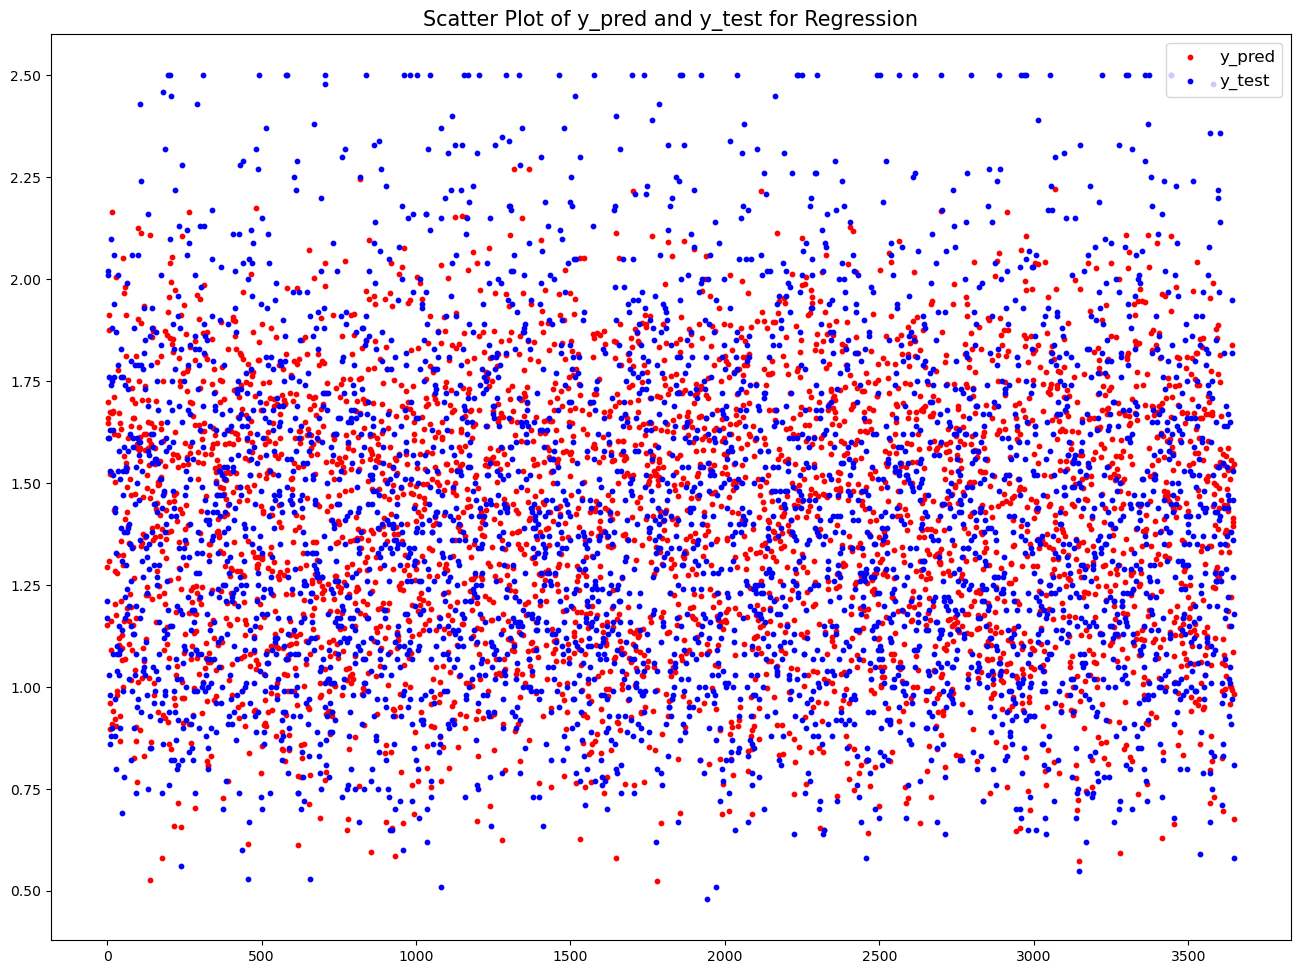

In [133]:
plt.figure(figsize=(16, 12),dpi=100)
red = plt.scatter(range(len(X_test)),y_pred,c='r',s = 10)
blue = plt.scatter(range(len(X_test)),y_test,c='b', s = 10)
plt.title("Scatter Plot of y_pred and y_test for Regression",fontsize=15)
plt.legend((red,blue),("y_pred","y_test"),scatterpoints=1, loc='upper right',fontsize=12)

**The above scatterplot comprises of the original and predicted values of the multiple linear regression model.**

<h3>Fitting Random Forest Regression Model</h3>

**The following code snippet fits the random forest regression model on X_train and y_train and predicts the values for X_test and stores it in y_pred_rf. It also prints the outputs of the functions defined above. Hence giving us a useful summary for the random forest regression model.**

In [134]:
from sklearn.ensemble import RandomForestRegressor

classifier = RandomForestRegressor()
classifier.fit(X_train, y_train)
y_pred_rf = classifier.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(classifier)

Explained_variance:  0.9047
R2:  0.9047
Adjusted_r2:  0.9026
MAE:  0.0895
MSE:  0.0155
RMSE:  0.1244
Accuracy: 88.57 %
Standard Deviation: 0.56 %


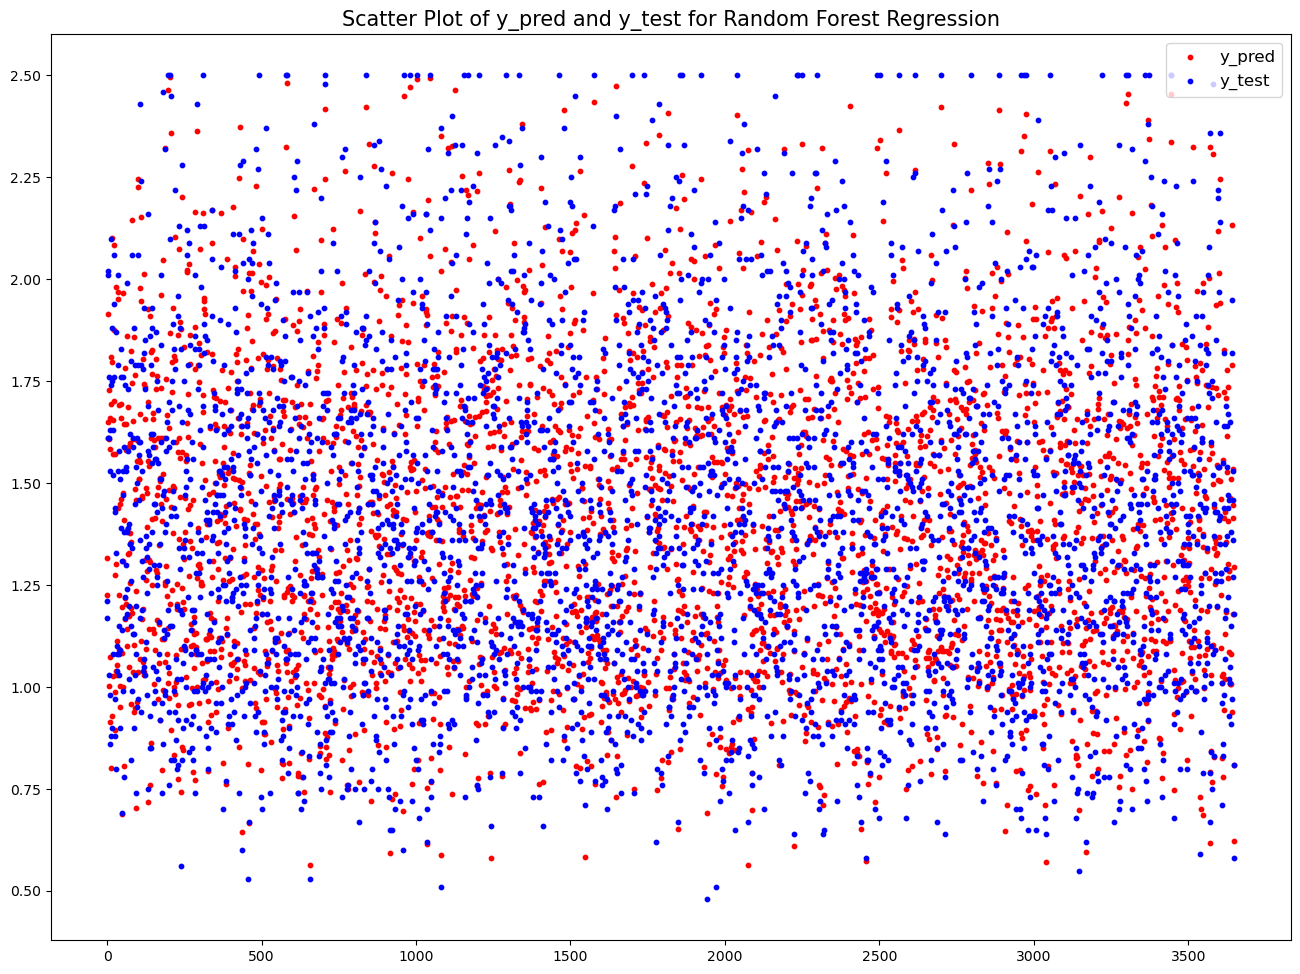

In [135]:
plt.figure(figsize=(16, 12),dpi=100)
red=plt.scatter(range(len(X_test)),y_pred_rf,c='r',s = 10)
blue=plt.scatter(range(len(X_test)),y_test,c='b', s = 10)
plt.title("Scatter Plot of y_pred and y_test for Random Forest Regression",fontsize=15)
plt.legend((red,blue),("y_pred","y_test"),scatterpoints=1, loc='upper right',fontsize=12)

**The above scatterplot comprises of the original and predicted values of the random forest regression model.**

<h3>Fitting Decision Tree Regression Model</h3>

**The following code snippet fits the decision tree regression model on X_train and y_train and predicts the values for X_test and stores it in y_pred_dt. It also prints the outputs of the functions defined above. Hence giving us a useful summary for the decision tree regression model.**

In [136]:
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor(criterion='mse',splitter='random',random_state=10)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

Explained_variance:  0.8419
R2:  0.8419
Adjusted_r2:  0.8385
MAE:  0.1052
MSE:  0.0257
RMSE:  0.1602
Accuracy: 81.33 %
Standard Deviation: 1.26 %


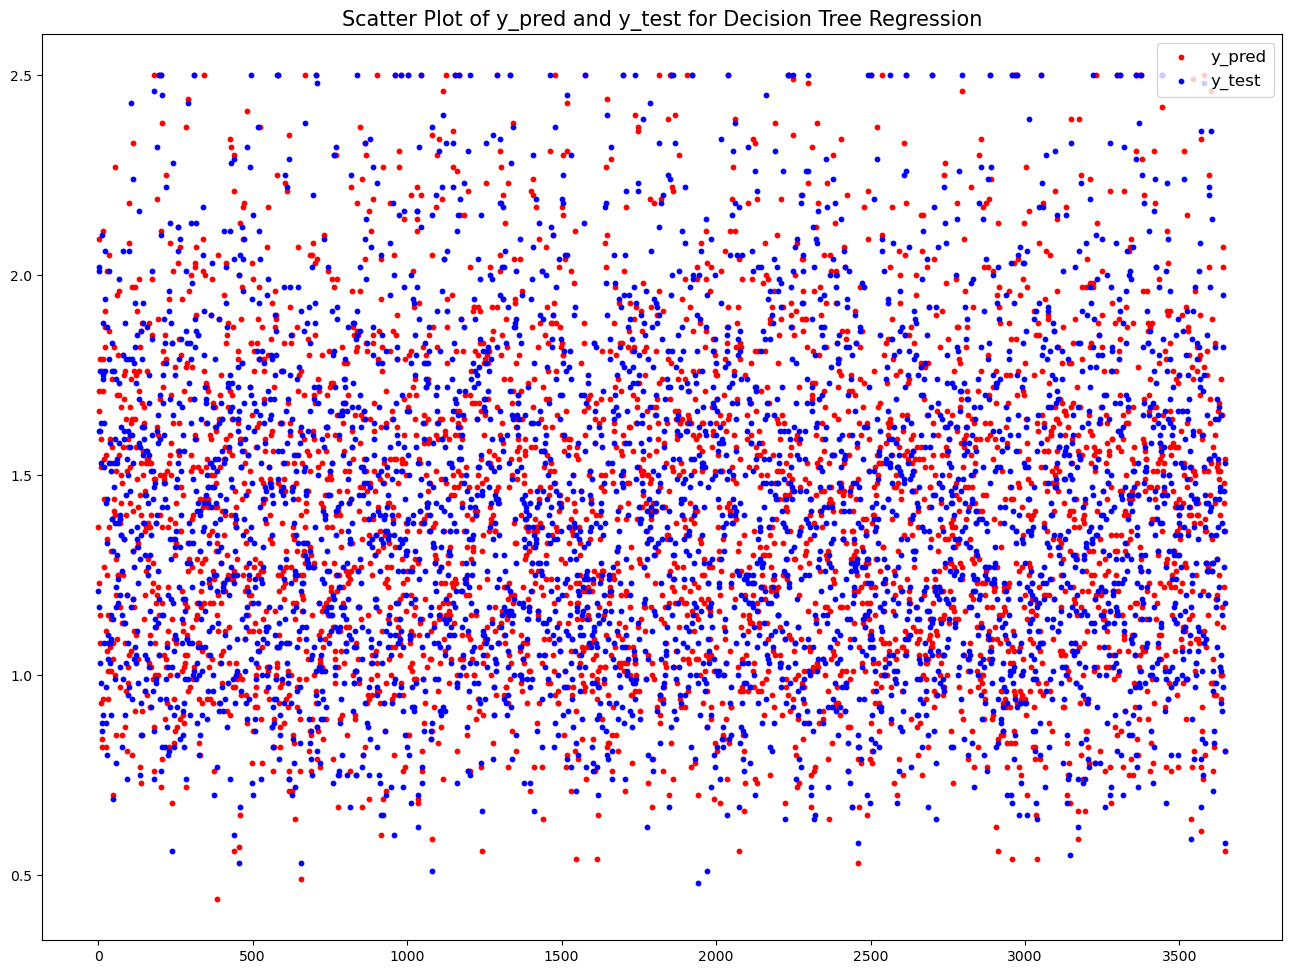

In [137]:
plt.figure(figsize=(16, 12),dpi=100)
red=plt.scatter(range(len(X_test)),y_pred_dt,c='r',s = 10)
blue=plt.scatter(range(len(X_test)),y_test,c='b', s = 10)
plt.title("Scatter Plot of y_pred and y_test for Decision Tree Regression",fontsize=15)
plt.legend((red,blue),("y_pred","y_test"),scatterpoints=1, loc='upper right',fontsize=12)

**The above scatterplot comprises of the original and predicted values of the random forest regression model.**

<h2>As our conclusion we proclaim that, using k-fold cross validation as the basis for model selection we declare random forest model as the best suited model for our purpose of predicting average avocado prices</h2>